# 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

예시

주택 가격 예측

매출액 예측

In [3]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) #e notation을 그냥 소수점으로 출력

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [9]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [10]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,9.68
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
171,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03


In [11]:
y_train.head()

369    50.0
35     18.9
122    20.5
500    16.8
171    19.1
Name: MEDV, dtype: float64

# 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값


### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값


### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값


In [12]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [13]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [14]:
my_mse(pred, actual)

4.0

In [15]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [16]:
my_mae(pred, actual)

2.0

In [17]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [18]:
my_rmse(pred, actual)

2.0

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [21]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(n_jobs=-1) # 모든 코어를 다 사용

In [25]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [26]:
pred = model.predict(x_test)

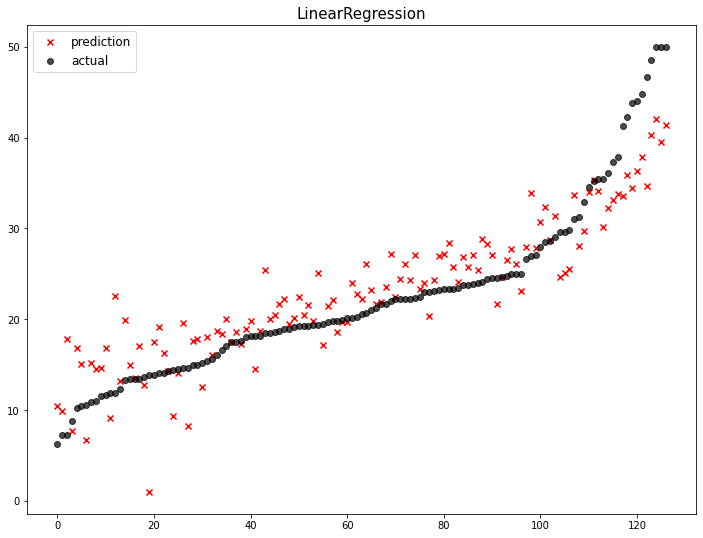

              model        mse
0  LinearRegression  17.851098


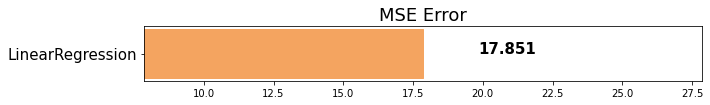

In [27]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [28]:
from sklearn.linear_model import Ridge

In [29]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

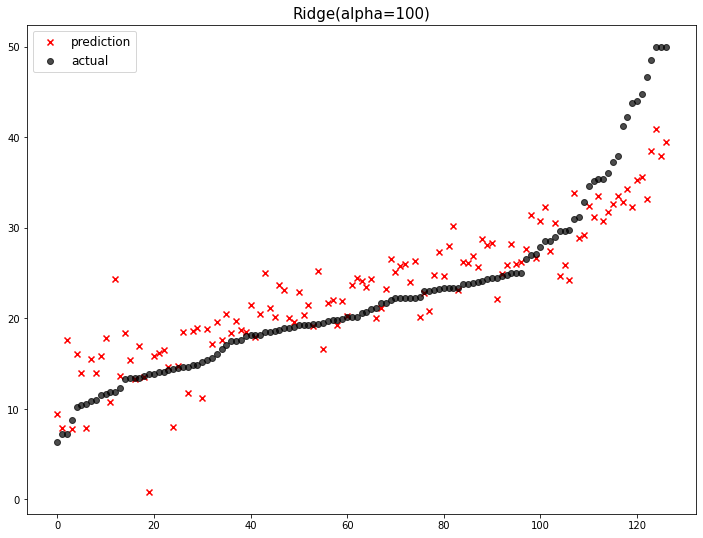

              model        mse
0  Ridge(alpha=100)  20.613687
1  LinearRegression  17.851098


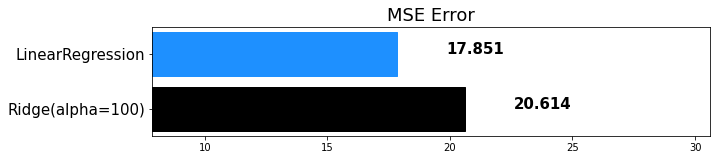

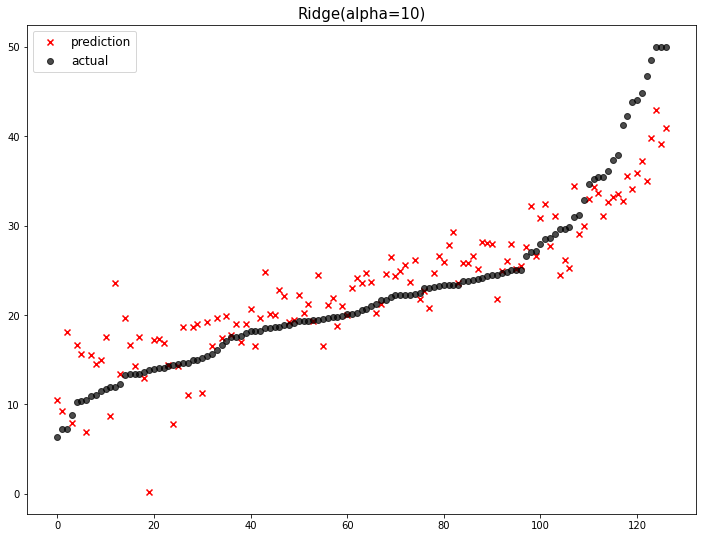

              model        mse
0  Ridge(alpha=100)  20.613687
1   Ridge(alpha=10)  18.329945
2  LinearRegression  17.851098


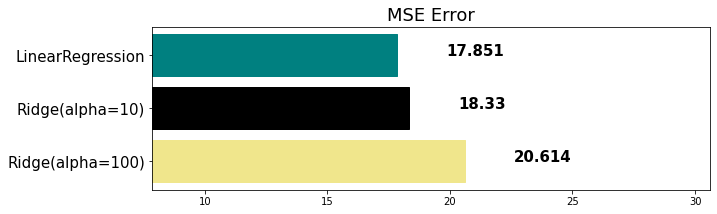

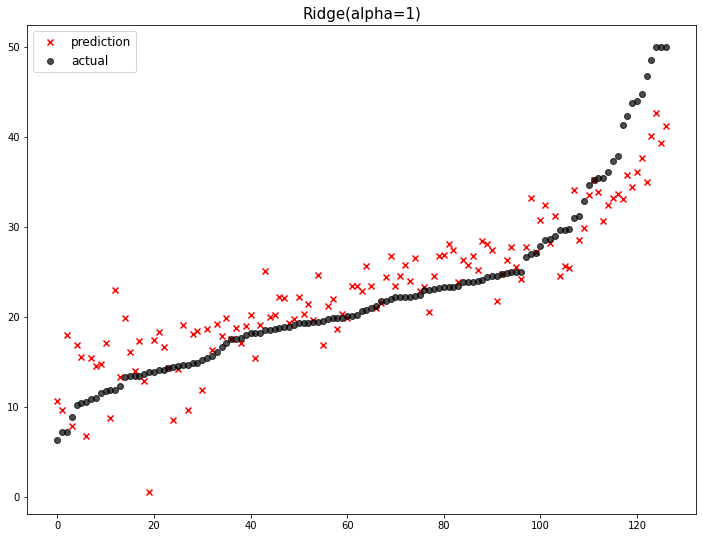

              model        mse
0  Ridge(alpha=100)  20.613687
1   Ridge(alpha=10)  18.329945
2    Ridge(alpha=1)  17.854933
3  LinearRegression  17.851098


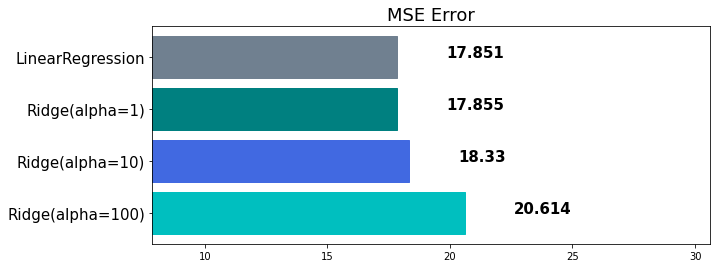

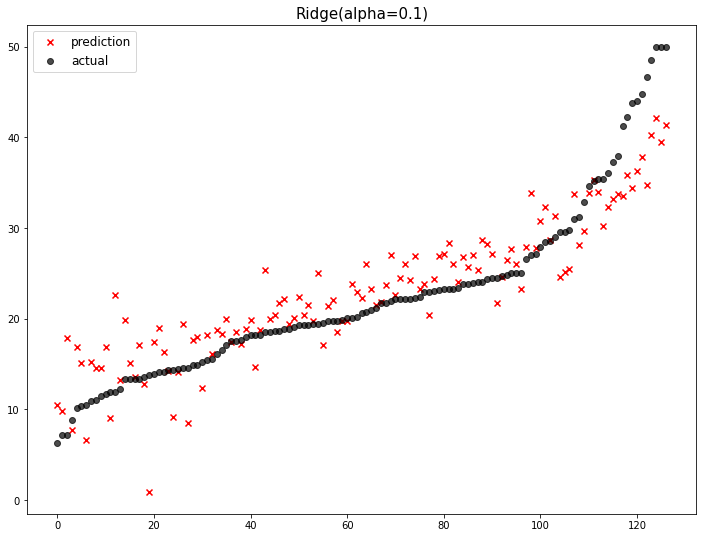

              model        mse
0  Ridge(alpha=100)  20.613687
1   Ridge(alpha=10)  18.329945
2    Ridge(alpha=1)  17.854933
3  LinearRegression  17.851098
4  Ridge(alpha=0.1)  17.823997


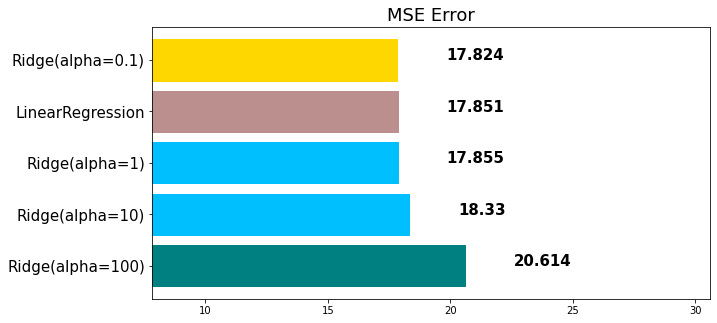

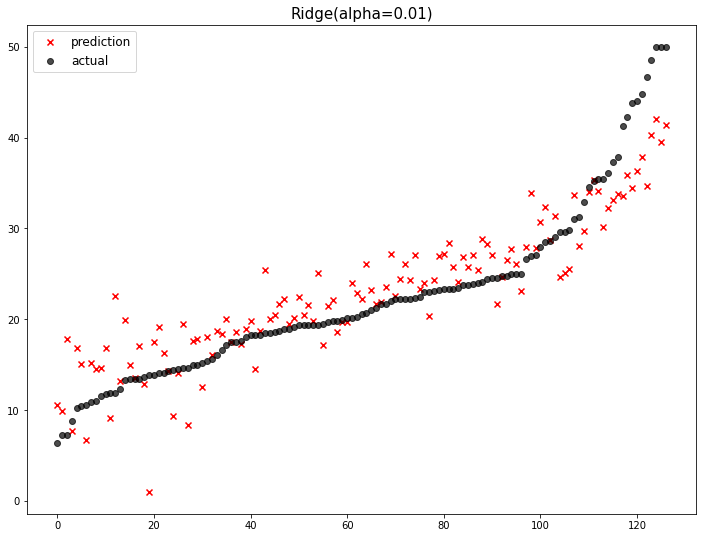

               model        mse
0   Ridge(alpha=100)  20.613687
1    Ridge(alpha=10)  18.329945
2     Ridge(alpha=1)  17.854933
3   LinearRegression  17.851098
4  Ridge(alpha=0.01)  17.847646
5   Ridge(alpha=0.1)  17.823997


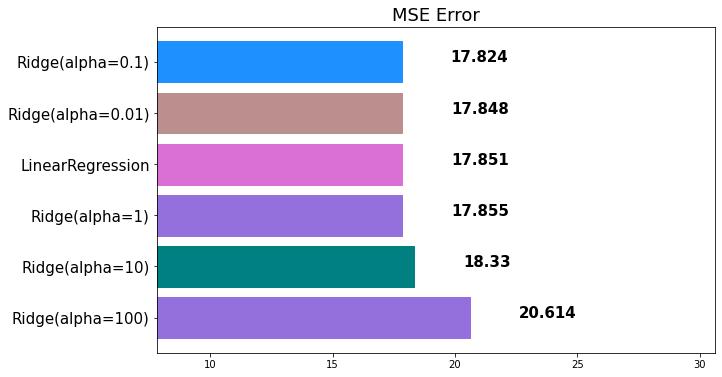

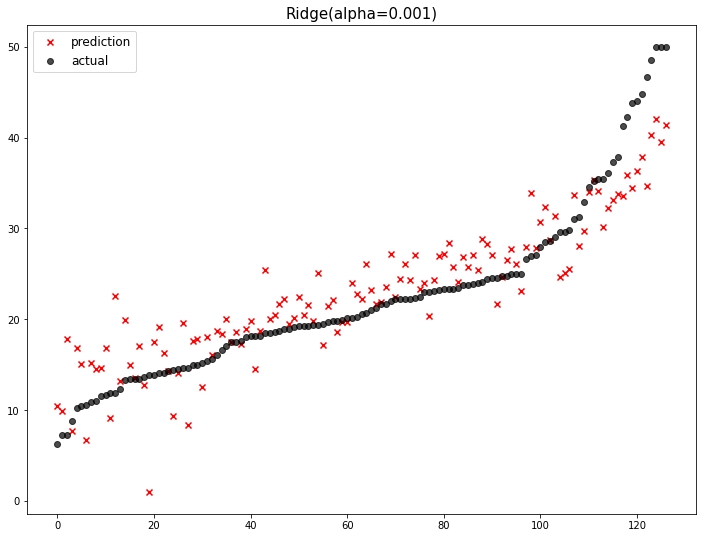

                model        mse
0    Ridge(alpha=100)  20.613687
1     Ridge(alpha=10)  18.329945
2      Ridge(alpha=1)  17.854933
3    LinearRegression  17.851098
4  Ridge(alpha=0.001)  17.850744
5   Ridge(alpha=0.01)  17.847646
6    Ridge(alpha=0.1)  17.823997


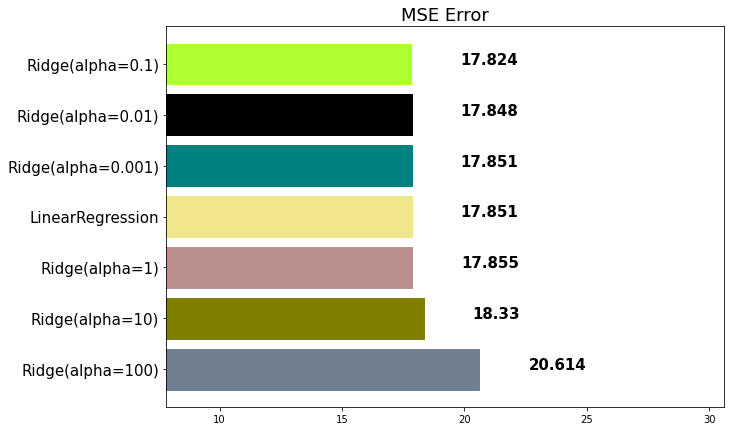

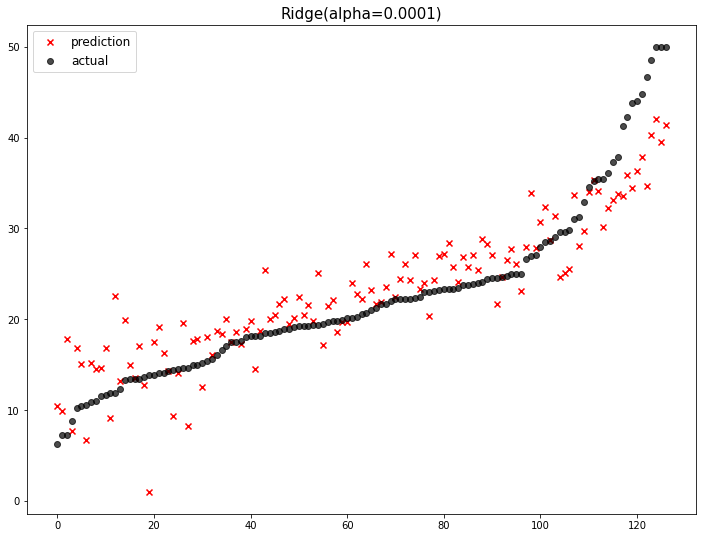

                 model        mse
0     Ridge(alpha=100)  20.613687
1      Ridge(alpha=10)  18.329945
2       Ridge(alpha=1)  17.854933
3     LinearRegression  17.851098
4  Ridge(alpha=0.0001)  17.851063
5   Ridge(alpha=0.001)  17.850744
6    Ridge(alpha=0.01)  17.847646
7     Ridge(alpha=0.1)  17.823997


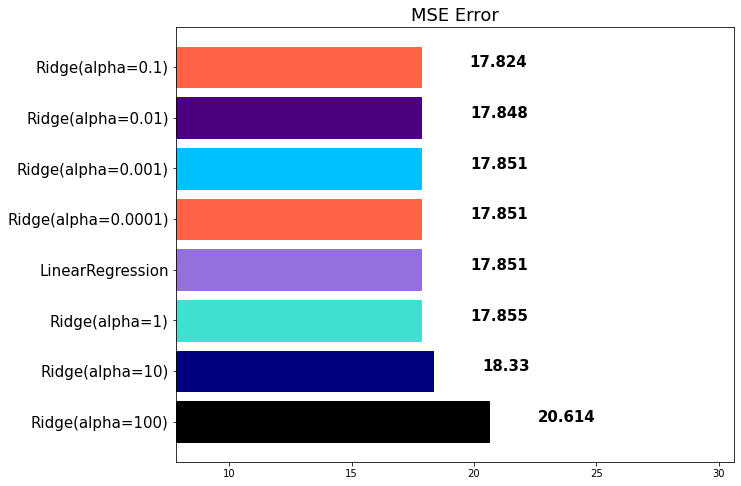

In [30]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
ridge.coef_

array([ -0.09626236,   0.03270821,   0.03067691,   3.29953148,
       -18.74979332,   3.33956567,   0.01102085,  -1.30374252,
         0.30229825,  -0.0111606 ,  -0.97272303,   0.00773315,
        -0.57088986])

In [33]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

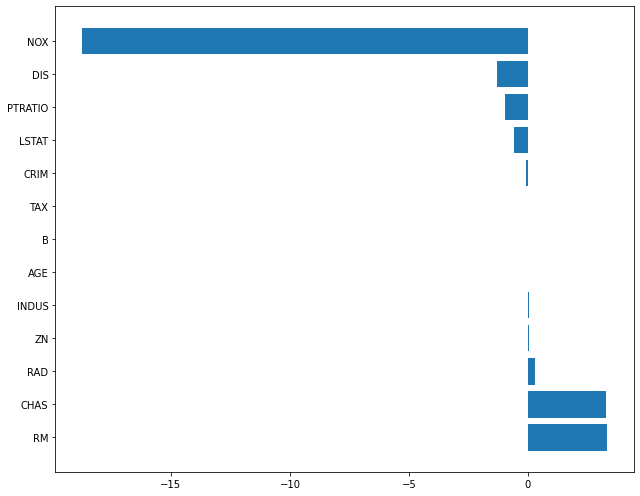

In [34]:
plot_coef(x_train.columns, ridge.coef_)

In [35]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

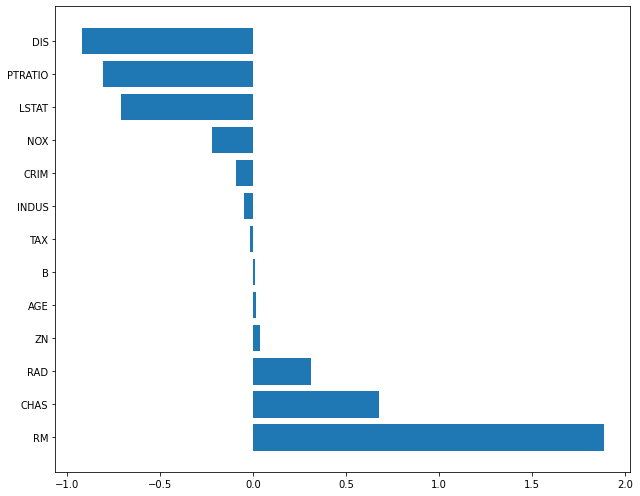

In [36]:
plot_coef(x_train.columns, ridge_100.coef_)

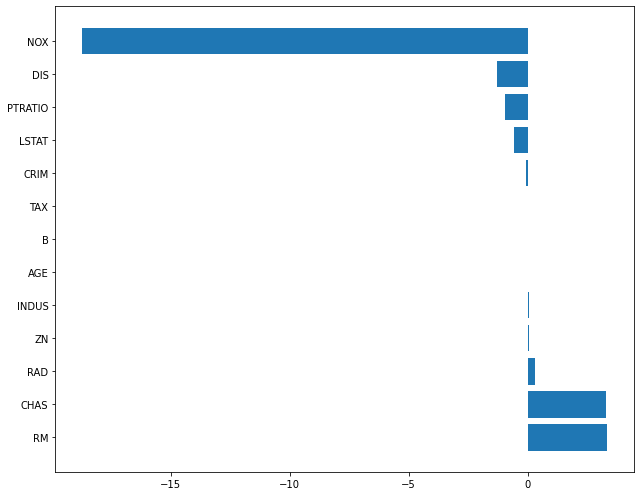

In [37]:
plot_coef(x_train.columns, ridge_001.coef_)

샘플 데이터의 수가 많다면 규제를 적게 주어도 일반화에 문제가 없지만, 데이터 수가 적다면 강한 규제를 걸어주는 것이 일반화에 좋다. (과적합을 피하기 위해)

In [38]:
from sklearn.linear_model import Lasso
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

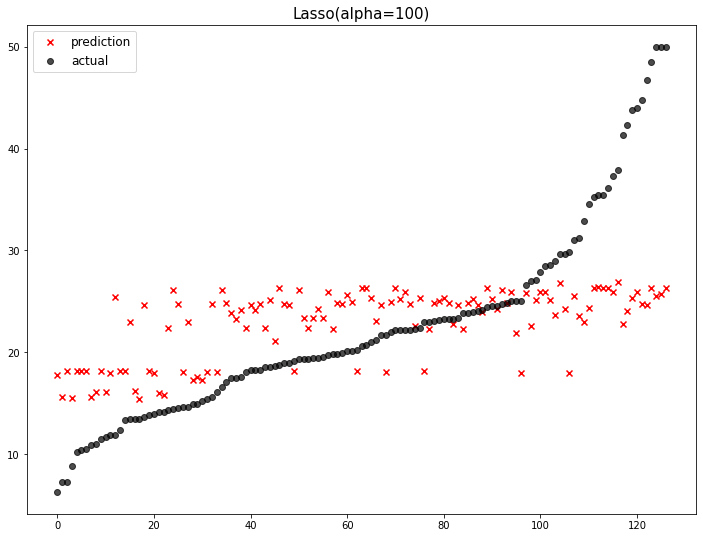

                 model        mse
0     Lasso(alpha=100)  66.744721
1     Ridge(alpha=100)  20.613687
2      Ridge(alpha=10)  18.329945
3       Ridge(alpha=1)  17.854933
4     LinearRegression  17.851098
5  Ridge(alpha=0.0001)  17.851063
6   Ridge(alpha=0.001)  17.850744
7    Ridge(alpha=0.01)  17.847646
8     Ridge(alpha=0.1)  17.823997


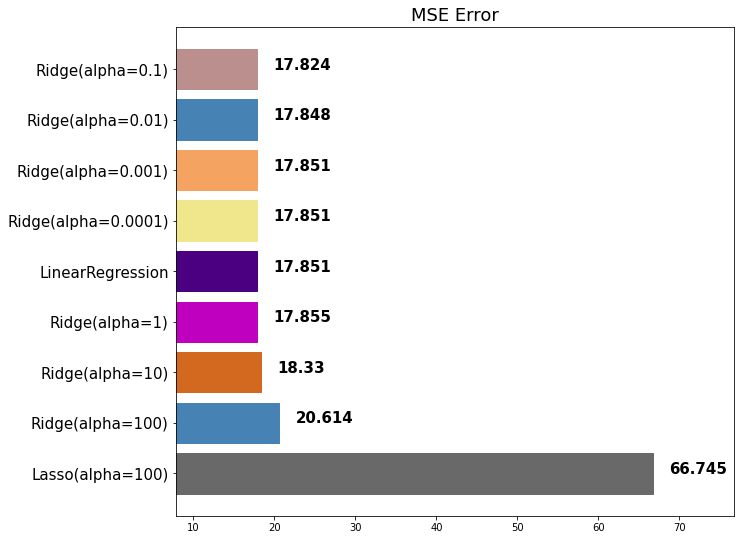

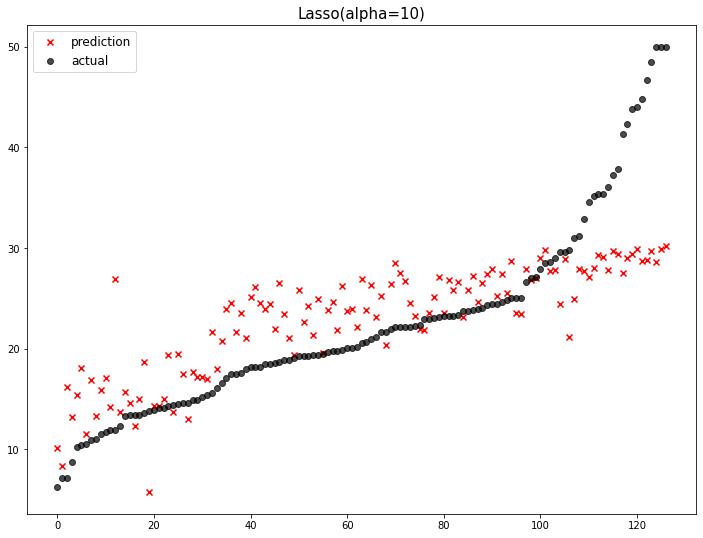

                 model        mse
0     Lasso(alpha=100)  66.744721
1      Lasso(alpha=10)  41.956236
2     Ridge(alpha=100)  20.613687
3      Ridge(alpha=10)  18.329945
4       Ridge(alpha=1)  17.854933
5     LinearRegression  17.851098
6  Ridge(alpha=0.0001)  17.851063
7   Ridge(alpha=0.001)  17.850744
8    Ridge(alpha=0.01)  17.847646
9     Ridge(alpha=0.1)  17.823997


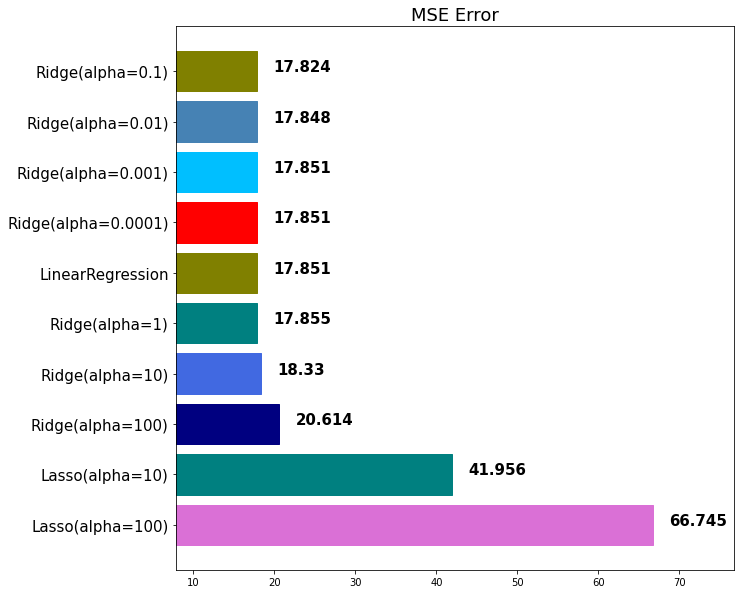

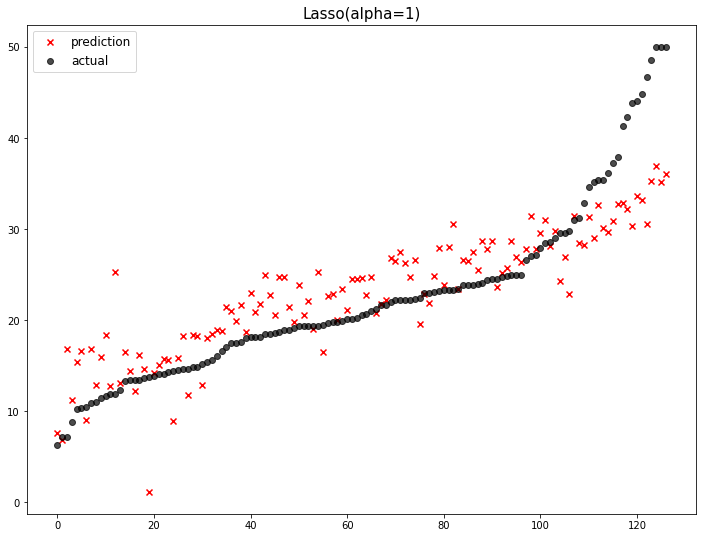

                  model        mse
0      Lasso(alpha=100)  66.744721
1       Lasso(alpha=10)  41.956236
2        Lasso(alpha=1)  27.085208
3      Ridge(alpha=100)  20.613687
4       Ridge(alpha=10)  18.329945
5        Ridge(alpha=1)  17.854933
6      LinearRegression  17.851098
7   Ridge(alpha=0.0001)  17.851063
8    Ridge(alpha=0.001)  17.850744
9     Ridge(alpha=0.01)  17.847646
10     Ridge(alpha=0.1)  17.823997


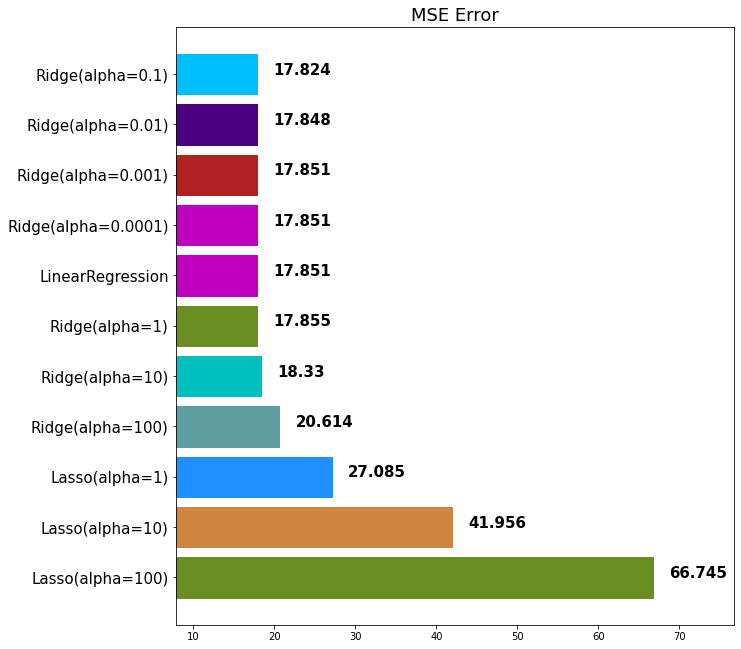

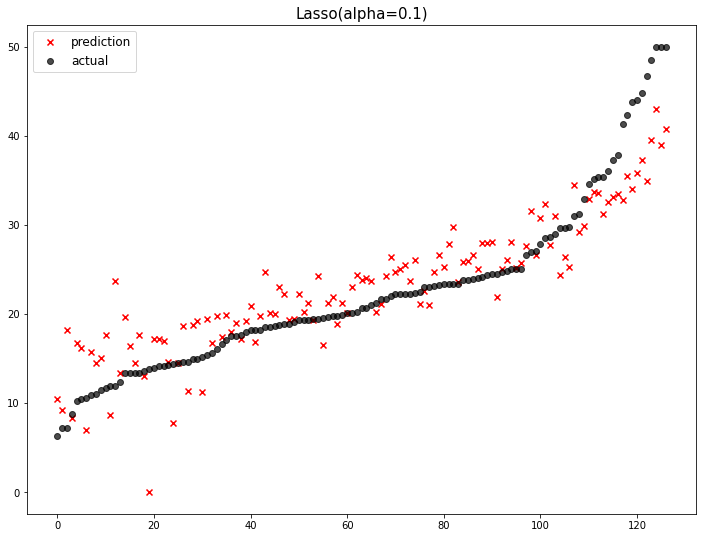

                  model        mse
0      Lasso(alpha=100)  66.744721
1       Lasso(alpha=10)  41.956236
2        Lasso(alpha=1)  27.085208
3      Ridge(alpha=100)  20.613687
4      Lasso(alpha=0.1)  18.562499
5       Ridge(alpha=10)  18.329945
6        Ridge(alpha=1)  17.854933
7      LinearRegression  17.851098
8   Ridge(alpha=0.0001)  17.851063
9    Ridge(alpha=0.001)  17.850744
10    Ridge(alpha=0.01)  17.847646
11     Ridge(alpha=0.1)  17.823997


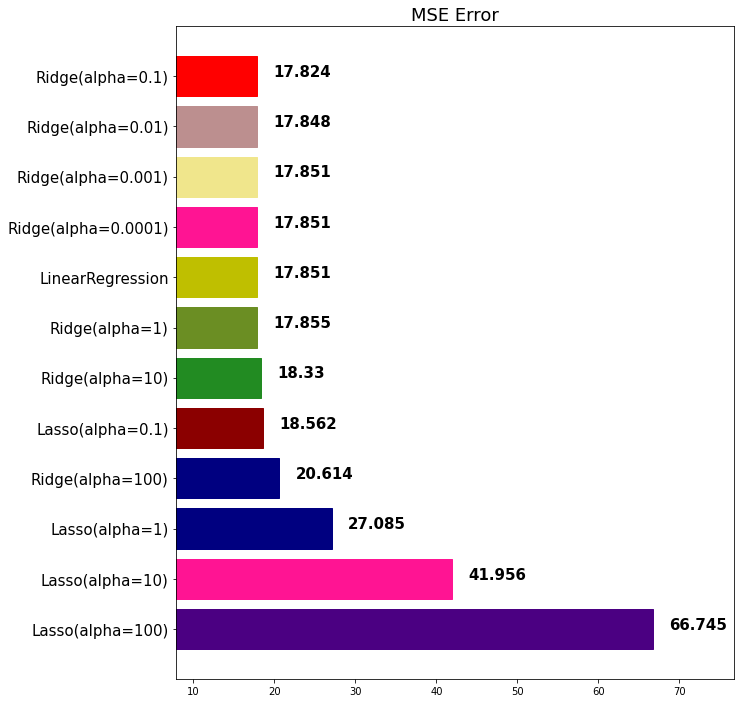

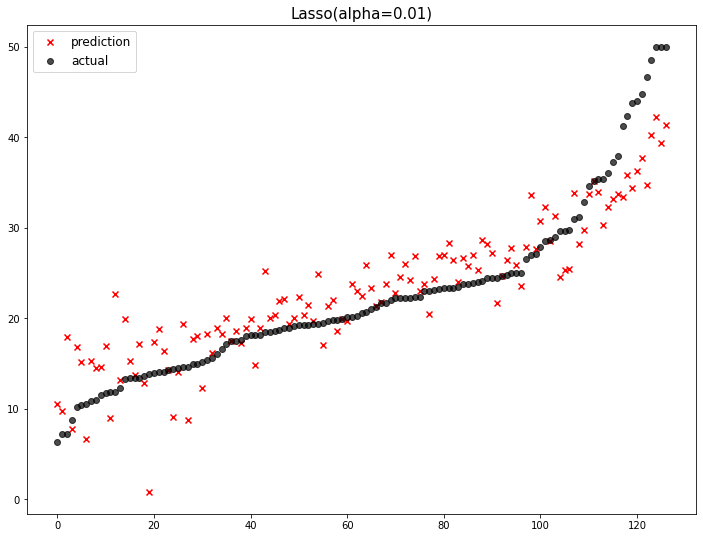

                  model        mse
0      Lasso(alpha=100)  66.744721
1       Lasso(alpha=10)  41.956236
2        Lasso(alpha=1)  27.085208
3      Ridge(alpha=100)  20.613687
4      Lasso(alpha=0.1)  18.562499
5       Ridge(alpha=10)  18.329945
6        Ridge(alpha=1)  17.854933
7      LinearRegression  17.851098
8   Ridge(alpha=0.0001)  17.851063
9    Ridge(alpha=0.001)  17.850744
10    Ridge(alpha=0.01)  17.847646
11     Ridge(alpha=0.1)  17.823997
12    Lasso(alpha=0.01)  17.813638


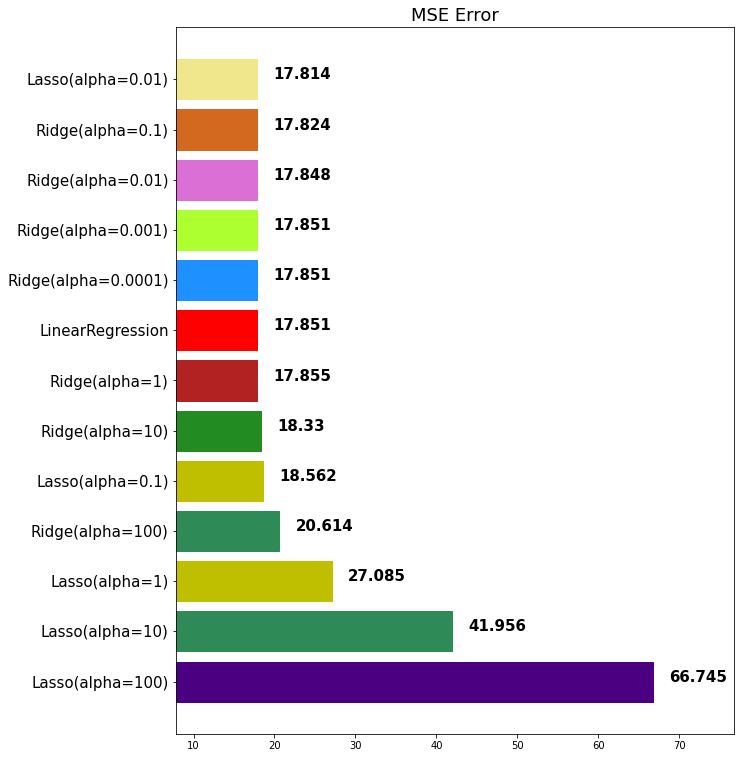

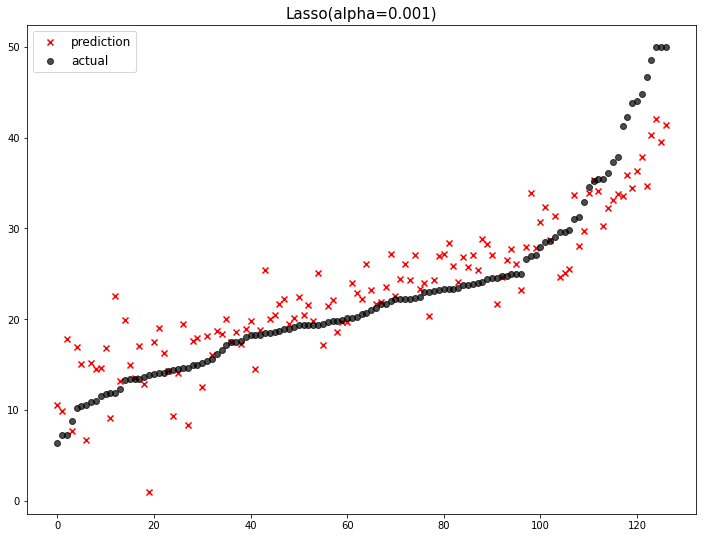

                  model        mse
0      Lasso(alpha=100)  66.744721
1       Lasso(alpha=10)  41.956236
2        Lasso(alpha=1)  27.085208
3      Ridge(alpha=100)  20.613687
4      Lasso(alpha=0.1)  18.562499
5       Ridge(alpha=10)  18.329945
6        Ridge(alpha=1)  17.854933
7      LinearRegression  17.851098
8   Ridge(alpha=0.0001)  17.851063
9    Ridge(alpha=0.001)  17.850744
10    Ridge(alpha=0.01)  17.847646
11   Lasso(alpha=0.001)  17.844744
12     Ridge(alpha=0.1)  17.823997
13    Lasso(alpha=0.01)  17.813638


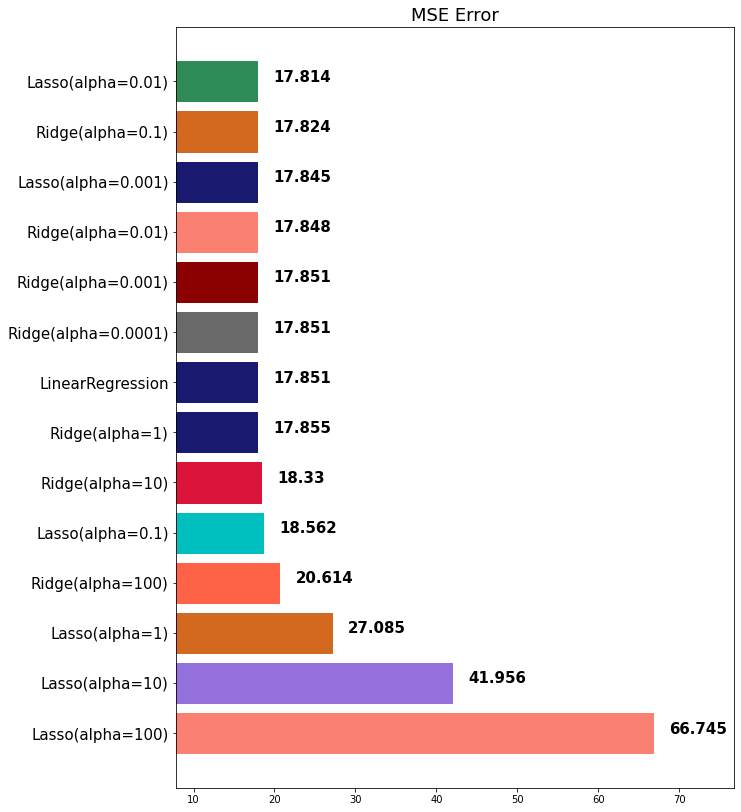

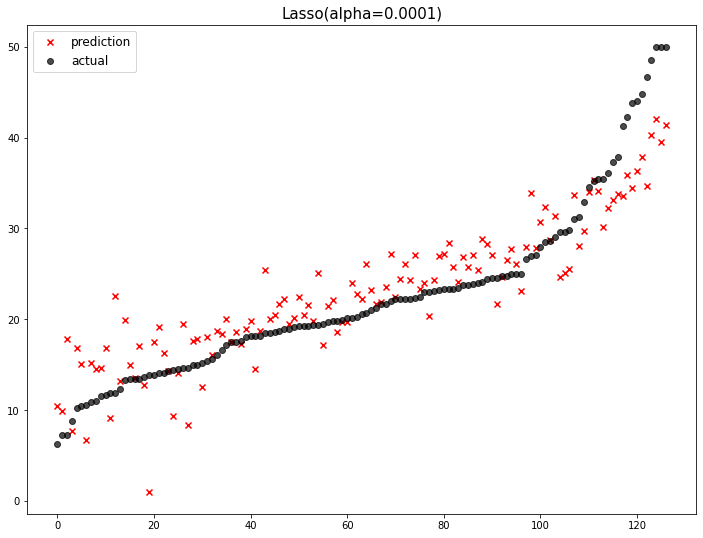

                  model        mse
0      Lasso(alpha=100)  66.744721
1       Lasso(alpha=10)  41.956236
2        Lasso(alpha=1)  27.085208
3      Ridge(alpha=100)  20.613687
4      Lasso(alpha=0.1)  18.562499
5       Ridge(alpha=10)  18.329945
6        Ridge(alpha=1)  17.854933
7      LinearRegression  17.851098
8   Ridge(alpha=0.0001)  17.851063
9    Ridge(alpha=0.001)  17.850744
10  Lasso(alpha=0.0001)  17.850436
11    Ridge(alpha=0.01)  17.847646
12   Lasso(alpha=0.001)  17.844744
13     Ridge(alpha=0.1)  17.823997
14    Lasso(alpha=0.01)  17.813638


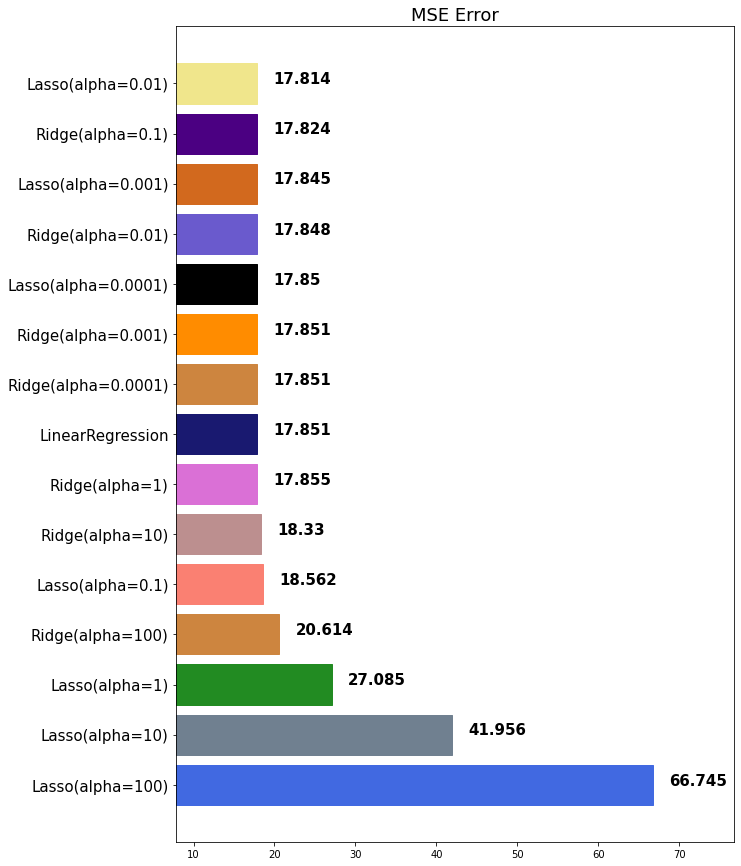

In [39]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [40]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

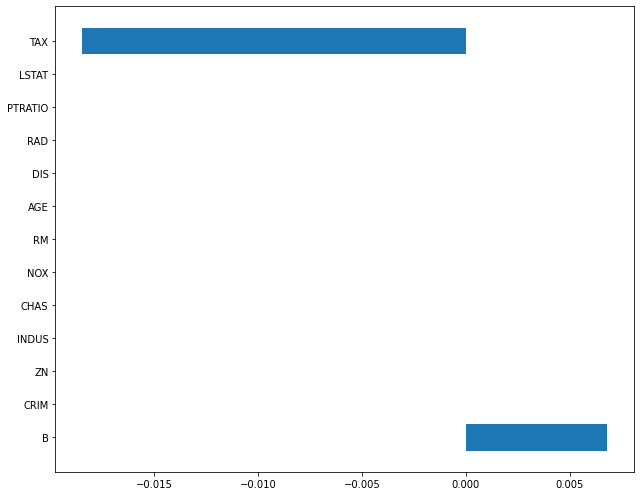

In [41]:
plot_coef(x_train.columns, lasso_100.coef_)

In [42]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01849641,
       -0.        ,  0.00681223, -0.        ])

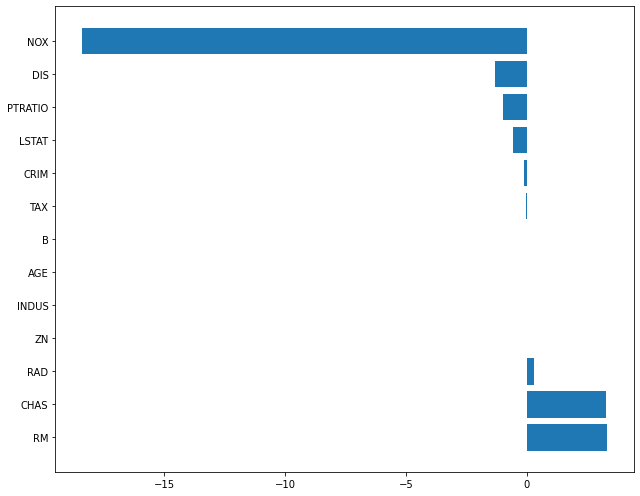

In [43]:
plot_coef(x_train.columns, lasso_001.coef_)

In [44]:
lasso_001.coef_

array([ -0.09602616,   0.03276019,   0.02933339,   3.2832768 ,
       -18.42810296,   3.34063424,   0.01078631,  -1.29876915,
         0.30163812,  -0.01119142,  -0.96873414,   0.00775196,
        -0.57148472])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
ratios = [0.2, 0.5, 0.8]

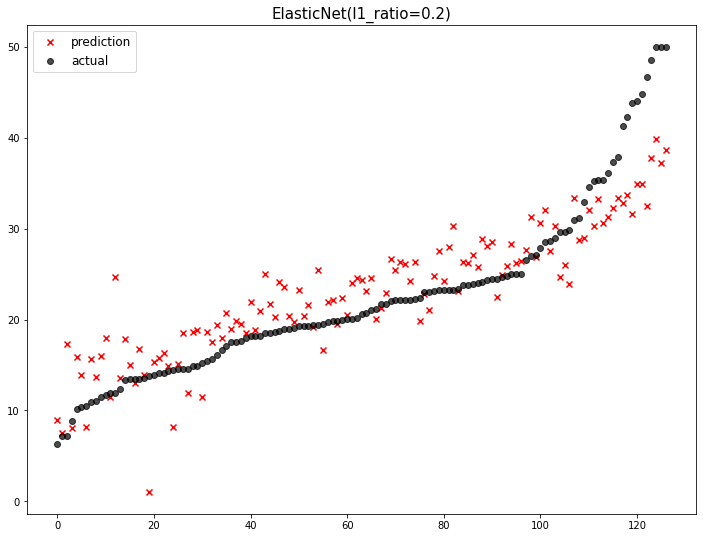

                       model        mse
0           Lasso(alpha=100)  66.744721
1            Lasso(alpha=10)  41.956236
2             Lasso(alpha=1)  27.085208
3   ElasticNet(l1_ratio=0.2)  22.087806
4           Ridge(alpha=100)  20.613687
5           Lasso(alpha=0.1)  18.562499
6            Ridge(alpha=10)  18.329945
7             Ridge(alpha=1)  17.854933
8           LinearRegression  17.851098
9        Ridge(alpha=0.0001)  17.851063
10        Ridge(alpha=0.001)  17.850744
11       Lasso(alpha=0.0001)  17.850436
12         Ridge(alpha=0.01)  17.847646
13        Lasso(alpha=0.001)  17.844744
14          Ridge(alpha=0.1)  17.823997
15         Lasso(alpha=0.01)  17.813638


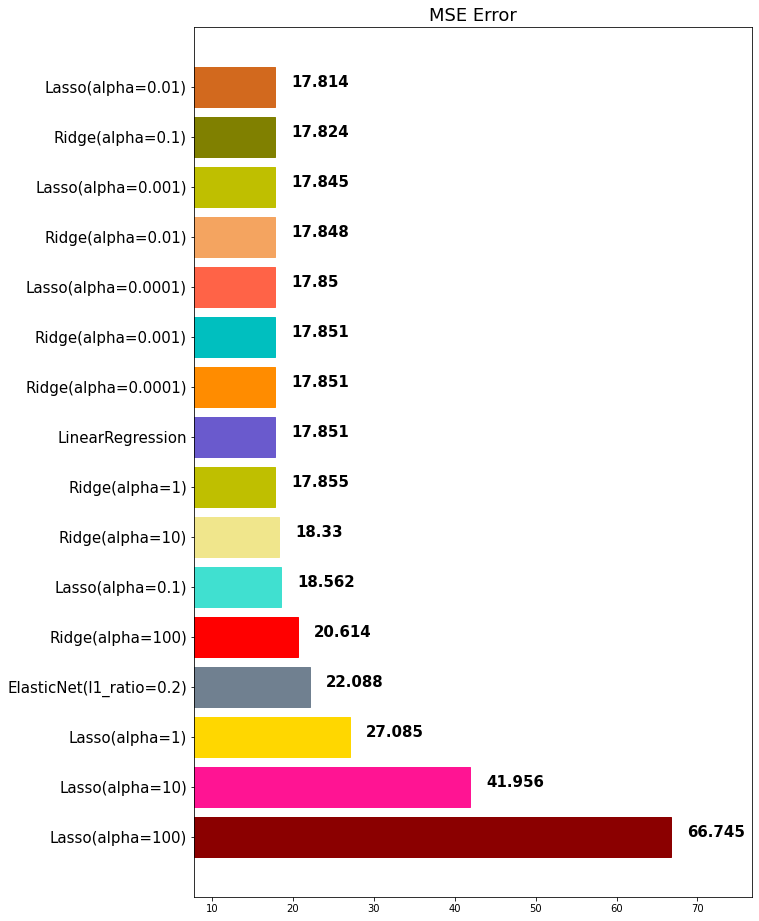

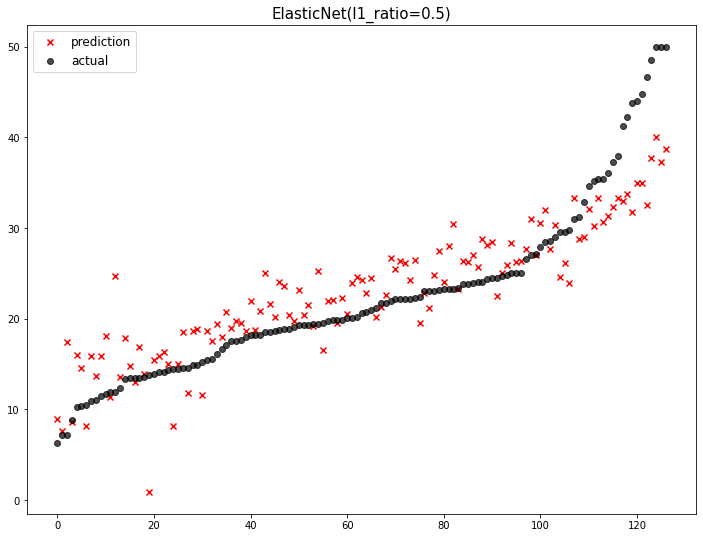

                       model        mse
0           Lasso(alpha=100)  66.744721
1            Lasso(alpha=10)  41.956236
2             Lasso(alpha=1)  27.085208
3   ElasticNet(l1_ratio=0.2)  22.087806
4   ElasticNet(l1_ratio=0.5)  21.976547
5           Ridge(alpha=100)  20.613687
6           Lasso(alpha=0.1)  18.562499
7            Ridge(alpha=10)  18.329945
8             Ridge(alpha=1)  17.854933
9           LinearRegression  17.851098
10       Ridge(alpha=0.0001)  17.851063
11        Ridge(alpha=0.001)  17.850744
12       Lasso(alpha=0.0001)  17.850436
13         Ridge(alpha=0.01)  17.847646
14        Lasso(alpha=0.001)  17.844744
15          Ridge(alpha=0.1)  17.823997
16         Lasso(alpha=0.01)  17.813638


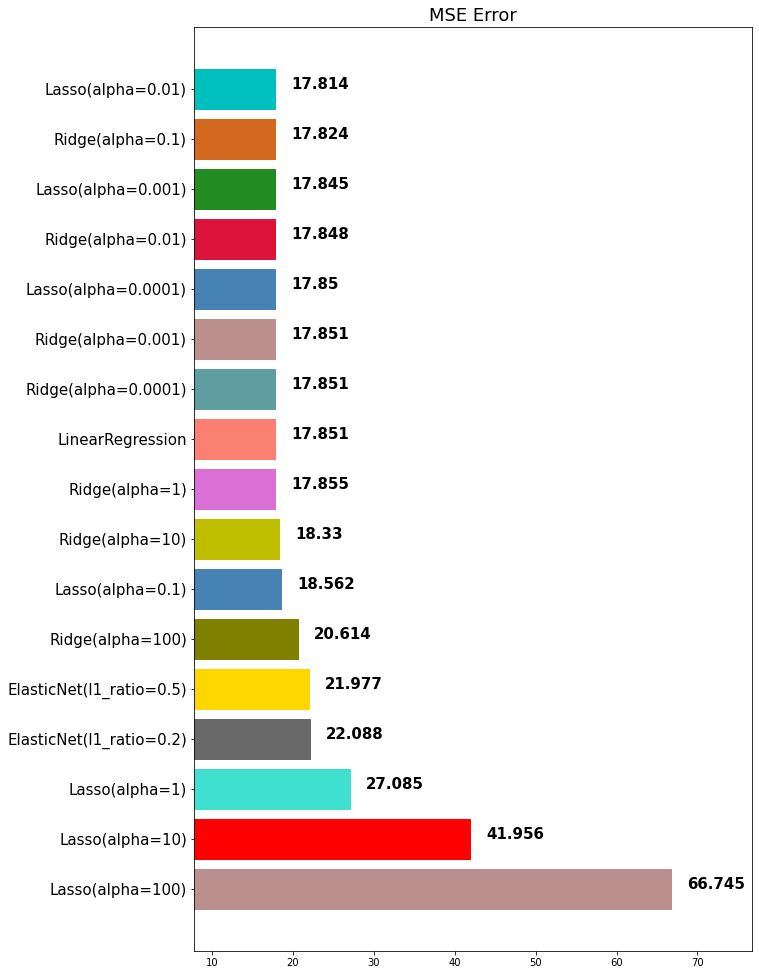

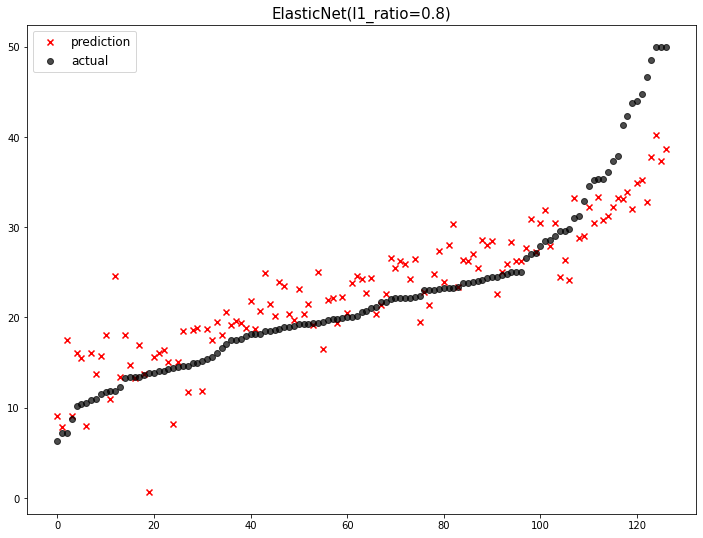

                       model        mse
0           Lasso(alpha=100)  66.744721
1            Lasso(alpha=10)  41.956236
2             Lasso(alpha=1)  27.085208
3   ElasticNet(l1_ratio=0.2)  22.087806
4   ElasticNet(l1_ratio=0.5)  21.976547
5   ElasticNet(l1_ratio=0.8)  21.727520
6           Ridge(alpha=100)  20.613687
7           Lasso(alpha=0.1)  18.562499
8            Ridge(alpha=10)  18.329945
9             Ridge(alpha=1)  17.854933
10          LinearRegression  17.851098
11       Ridge(alpha=0.0001)  17.851063
12        Ridge(alpha=0.001)  17.850744
13       Lasso(alpha=0.0001)  17.850436
14         Ridge(alpha=0.01)  17.847646
15        Lasso(alpha=0.001)  17.844744
16          Ridge(alpha=0.1)  17.823997
17         Lasso(alpha=0.01)  17.813638


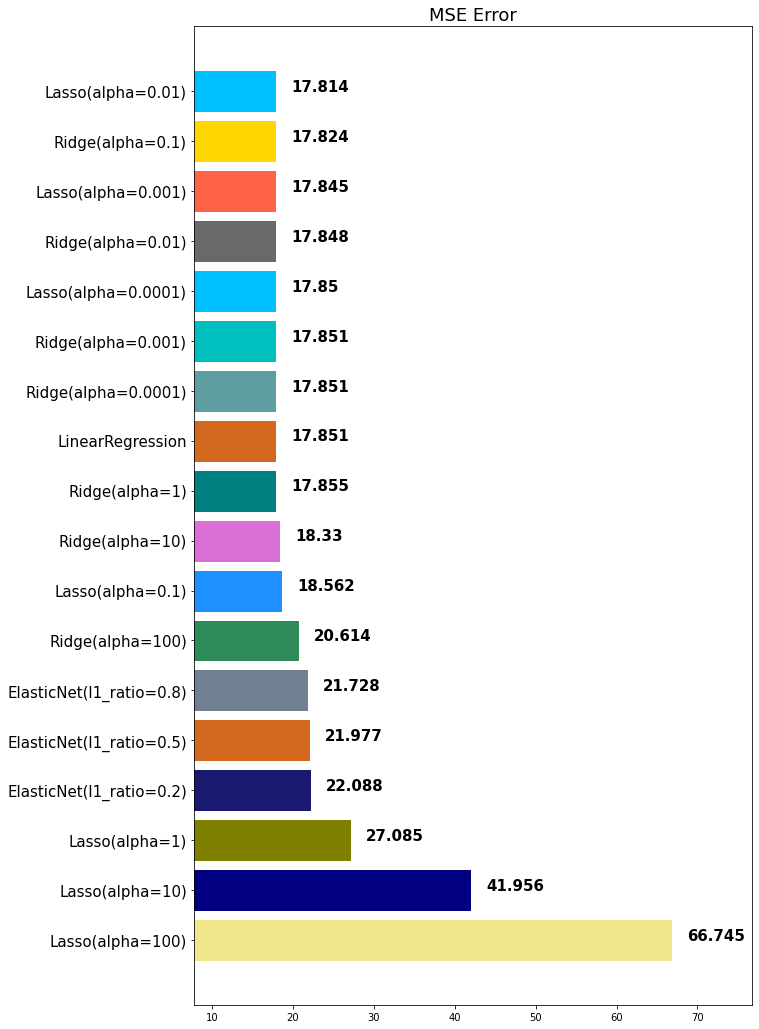

In [47]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [48]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

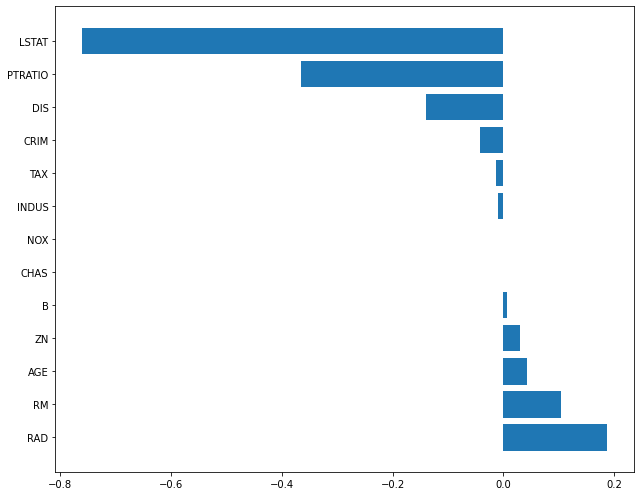

In [49]:
plot_coef(x_train.columns, elsticnet_20.coef_)

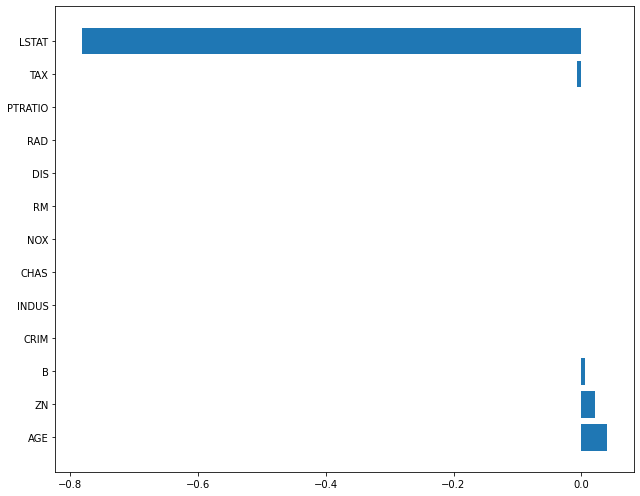

In [50]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [51]:
elsticnet_80.coef_

array([-0.        ,  0.02141666, -0.        ,  0.        , -0.        ,
        0.        ,  0.04039441, -0.        ,  0.        , -0.00726919,
       -0.        ,  0.00561268, -0.78102125])